In [3]:
import Pkg; 
Pkg.add("RecursiveArrayTools")

   Resolving package versions...
    Updating `C:\Users\adelpinoherrera\.julia\environments\v1.9\Project.toml`
  [731186ca] + RecursiveArrayTools v2.38.10
  No Changes to `C:\Users\adelpinoherrera\.julia\environments\v1.9\Manifest.toml`


In [5]:
Pkg.add("Optimization")
Pkg.add("ForwardDiff")
Pkg.add("OptimizationOptimJL")
Pkg.add("OptimizationBBO")

   Resolving package versions...
   Installed ConsoleProgressMonitor ───── v0.1.2
   Installed LeftChildRightSiblingTrees ─ v0.2.0
   Installed ProgressMeter ────────────── v1.9.0
   Installed ProgressLogging ──────────── v0.1.4
   Installed TerminalLoggers ──────────── v0.1.7
   Installed Optimization ─────────────── v3.19.1
   Installed AbstractTrees ────────────── v0.4.4
    Updating `C:\Users\adelpinoherrera\.julia\environments\v1.9\Project.toml`
  [7f7a1694] + Optimization v3.19.1
    Updating `C:\Users\adelpinoherrera\.julia\environments\v1.9\Manifest.toml`
  [1520ce14] + AbstractTrees v0.4.4
  [88cd18e8] + ConsoleProgressMonitor v0.1.2
  [1d6d02ad] + LeftChildRightSiblingTrees v0.2.0
  [7f7a1694] + Optimization v3.19.1
  [33c8b6b6] + ProgressLogging v0.1.4
  [92933f4c] + ProgressMeter v1.9.0
  [5d786b92] + TerminalLoggers v0.1.7
Precompiling project...
  ✓ ProgressLogging
  ✓ AbstractTrees
  ✓ ProgressMeter
  ✓ LeftChildRightSiblingTrees
  ✓ ConsoleProgressMonitor
  ✓ TerminalLo

In [30]:
Pkg.add("DataFrames")
Pkg.add("Statistics")

   Resolving package versions...
  No Changes to `C:\Users\adelpinoherrera\.julia\environments\v1.9\Project.toml`
  No Changes to `C:\Users\adelpinoherrera\.julia\environments\v1.9\Manifest.toml`


In [2]:
using DifferentialEquations, RecursiveArrayTools, Plots, DiffEqParamEstim
using Optimization, ForwardDiff, OptimizationOptimJL, OptimizationBBO

In [3]:
using CSV, DataFrames, Statistics

In [80]:
function f(du,u,p,t)
    du[1]=dx = p[1] * u[1]
end

u0=[1.0]
tspan=(0.0,10.0)
p=[0.2]
prob=ODEProblem(f,u0,tspan,p)

ODEProblem with uType Vector{Float64} and tType Float64. In-place: true
timespan: (0.0, 10.0)
u0: 1-element Vector{Float64}:
 1.0

In [47]:
a27801="C:\\Users\\adelpinoherrera\\Dropbox (UFL)\\research-share\\Adriana\\Conferences and Symposiums\\2023\\BMES\\Code\\a2780_norm.csv"
a2780=CSV.read(a27801,DataFrame)
data=Matrix(a2780)

1×11 Matrix{Float64}:
 1.0  0.883106  1.13093  4.72983  …  12.8544  14.8559  14.3684  11.1922

In [81]:
sol=solve(prob,Tsit5())

retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 8-element Vector{Float64}:
  0.0
  0.13800054970813153
  0.9691003985098867
  2.4316544364253487
  4.206979119058801
  6.408079607806688
  8.969386034101792
 10.0
u: 8-element Vector{Vector{Float64}}:
 [1.0]
 [1.0279845214266434]
 [1.2138778622500606]
 [1.6263380291928338]
 [2.319602357585909]
 [3.602455301433646]
 [6.012713958345448]
 [7.389048810738856]

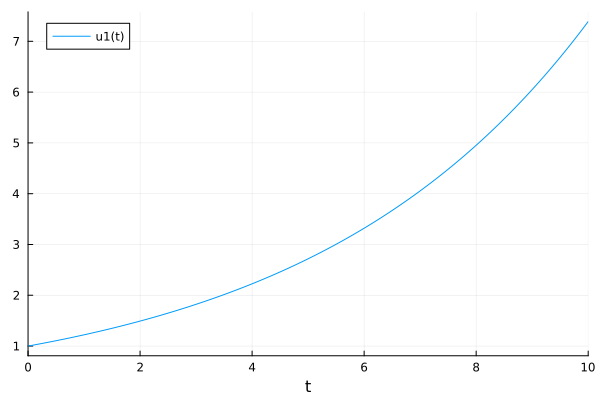

In [82]:
plot(sol)

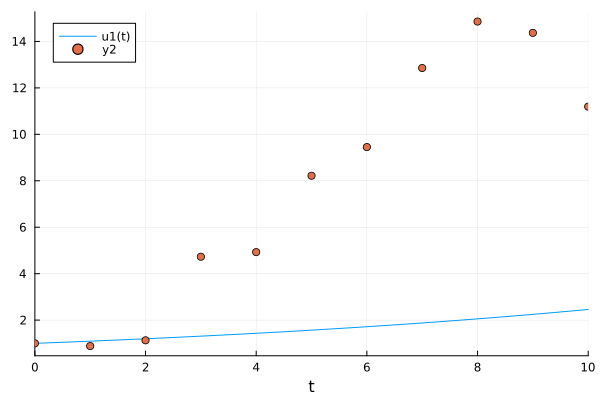

In [77]:
timepts = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0];
data_plot=data[1,:]
scatter!(timepts,data_plot)

In [59]:
data[1,:]

11-element Vector{Float64}:
  1.0
  0.883106427
  1.130932514
  4.729834578
  4.927316645
  8.216366564
  9.451324843
 12.8544137
 14.85593617
 14.36835017
 11.19222661

In [85]:
t = collect(range(0, stop = 10, length = 11))

11-element Vector{Float64}:
  0.0
  1.0
  2.0
  3.0
  4.0
  5.0
  6.0
  7.0
  8.0
  9.0
 10.0

In [86]:
cost_function = build_loss_objective(prob, Tsit5(), L2Loss(t, data),
                                     Optimization.AutoForwardDiff(),
                                     maxiters = 10000, verbose = false)

(::OptimizationFunction{true, AutoForwardDiff{nothing, Nothing}, DiffEqParamEstim.var"#29#30"{Nothing, typeof(DiffEqParamEstim.STANDARD_PROB_GENERATOR), Base.Pairs{Symbol, Integer, Tuple{Symbol, Symbol}, NamedTuple{(:maxiters, :verbose), Tuple{Int64, Bool}}}, ODEProblem{Vector{Float64}, Tuple{Float64, Float64}, true, Vector{Float64}, ODEFunction{true, SciMLBase.AutoSpecialize, typeof(f), LinearAlgebra.UniformScaling{Bool}, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, typeof(SciMLBase.DEFAULT_OBSERVED), Nothing, Nothing}, Base.Pairs{Symbol, Union{}, Tuple{}, NamedTuple{(), Tuple{}}}, SciMLBase.StandardODEProblem}, Tsit5{typeof(OrdinaryDiffEq.trivial_limiter!), typeof(OrdinaryDiffEq.trivial_limiter!), Static.False}, L2Loss{Vector{Float64}, Matrix{Float64}, Nothing, Nothing, Nothing}, Nothing, Tuple{}}, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing,

In [87]:
optprob = Optimization.OptimizationProblem(cost_function, [0.1])
optsol = solve(optprob, BFGS())

u: 1-element Vector{Float64}:
 0.28565793714957266

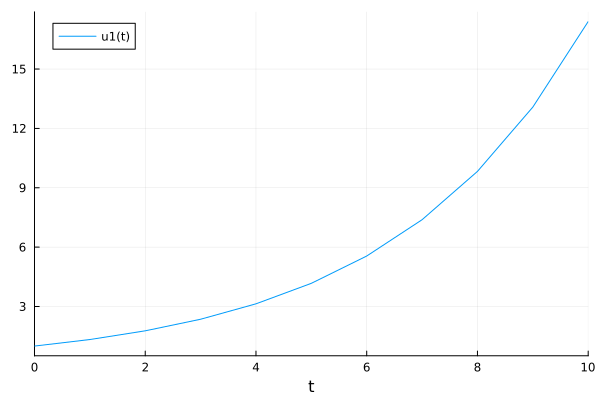

In [92]:
newprob = remake(prob, p = optsol.u)
newsol = solve(newprob, Tsit5(),saveat=1)
plot(newsol)

In [93]:
newsol

retcode: Success
Interpolation: 1st order linear
t: 11-element Vector{Float64}:
  0.0
  1.0
  2.0
  3.0
  4.0
  5.0
  6.0
  7.0
  8.0
  9.0
 10.0
u: 11-element Vector{Vector{Float64}}:
 [1.0]
 [1.3306374166607922]
 [1.7705957939015002]
 [2.356019840410582]
 [3.13500198756882]
 [4.171562667988583]
 [5.550804824669738]
 [7.386144482677013]
 [9.828172189849127]
 [13.077834035052838]
 [17.40184342890582]

In [113]:
#export data
CSV.write("Predicte_a2780.csv", newsol)

"Predicte_a2780.csv"

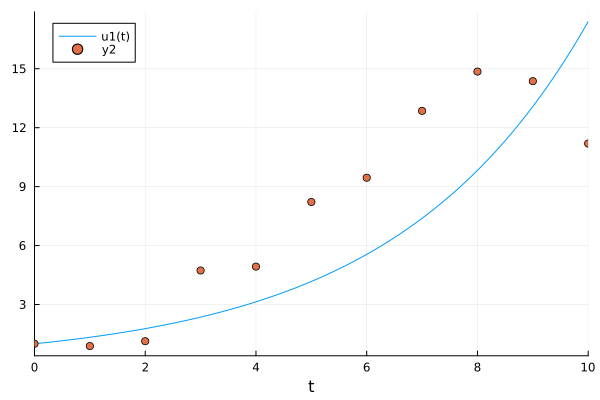

In [89]:
scatter!(timepts,data_plot)

In [112]:
rss=sum((newsol-data).^2)
tss=sum((data.-mean(data)).^2)
rsq=1-(rss./tss)

0.5273879477852479

A2780cis GFP

In [167]:
a2780G="C:\\Users\\adelpinoherrera\\Dropbox (UFL)\\research-share\\Adriana\\Conferences and Symposiums\\2023\\BMES\\Code\\a2780GFP_norm.csv"
a2780G=CSV.read(a2780G,DataFrame)
data_ag=Matrix(a2780G)

1×11 Matrix{Float64}:
 1.0  0.986298  1.07809  1.47361  …  4.5877  6.06131  7.93377  9.84128

In [185]:
data_ag_plot=data_ag[1,:]

11-element Vector{Float64}:
 1.0
 0.98629776
 1.0780852
 1.473605621
 2.269653052
 3.497935881
 3.35274484
 4.587703118
 6.06130874
 7.933772508
 9.841282389

In [169]:
cost_function_ag = build_loss_objective(prob, Tsit5(), L2Loss(t, data_ag),
                                     Optimization.AutoForwardDiff(),
                                     maxiters = 10000, verbose = false)

(::OptimizationFunction{true, AutoForwardDiff{nothing, Nothing}, DiffEqParamEstim.var"#29#30"{Nothing, typeof(DiffEqParamEstim.STANDARD_PROB_GENERATOR), Base.Pairs{Symbol, Integer, Tuple{Symbol, Symbol}, NamedTuple{(:maxiters, :verbose), Tuple{Int64, Bool}}}, ODEProblem{Vector{Float64}, Tuple{Float64, Float64}, true, Vector{Float64}, ODEFunction{true, SciMLBase.AutoSpecialize, typeof(f), LinearAlgebra.UniformScaling{Bool}, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, typeof(SciMLBase.DEFAULT_OBSERVED), Nothing, Nothing}, Base.Pairs{Symbol, Union{}, Tuple{}, NamedTuple{(), Tuple{}}}, SciMLBase.StandardODEProblem}, Tsit5{typeof(OrdinaryDiffEq.trivial_limiter!), typeof(OrdinaryDiffEq.trivial_limiter!), Static.False}, L2Loss{Vector{Float64}, Matrix{Float64}, Nothing, Nothing, Nothing}, Nothing, Tuple{}}, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing,

In [170]:
optprob_ag = Optimization.OptimizationProblem(cost_function_ag, [0.1])
optsol_ag = solve(optprob_ag, BFGS())

u: 1-element Vector{Float64}:
 0.2271180689691475

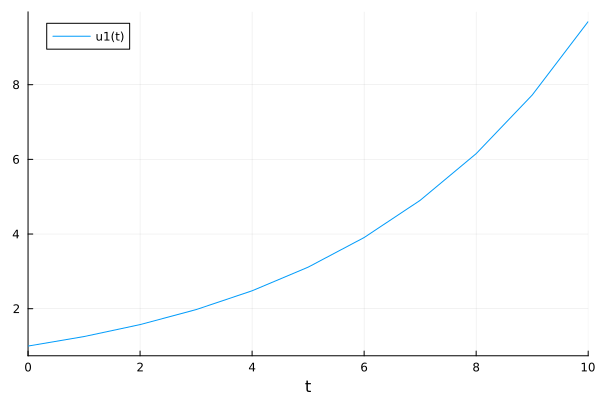

In [186]:
newprob_ag = remake(prob, p = optsol_ag.u)
newsol_ag = solve(newprob_ag, Tsit5(),saveat=1)
plot(newsol_ag)

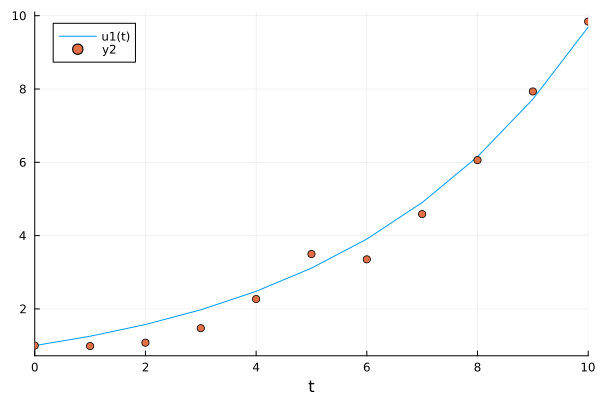

In [187]:
scatter!(timepts,data_ag_plot)

In [188]:
rss_ag=sum((newsol_ag-data_ag).^2)
tss_ag=sum((data_ag.-mean(data_ag)).^2)
rsq_ag=1-(rss_ag./tss_ag)

0.9862256987671871

In [210]:
#export data
CSV.write("Predicted_a2780_GFP_exp.csv", newsol_ag)

"Predicted_a2780_GFP_exp.csv"

Tyk-nu

In [194]:
tyk="C:\\Users\\adelpinoherrera\\Dropbox (UFL)\\research-share\\Adriana\\Conferences and Symposiums\\2023\\BMES\\Code\\tyk_norm.csv"
tyk1=CSV.read(tyk,DataFrame)
data_t=Matrix(tyk1)
data_t_plot=data_t[1,:]

11-element Vector{Float64}:
  1.0
  2.093866198
  2.571717172
  5.608768848
  9.81318987
 12.49978041
 14.68738106
 21.37256624
 28.59735031
 34.19221197
 27.66139657

In [195]:
cost_function_t = build_loss_objective(prob, Tsit5(), L2Loss(t, data_t),
                                     Optimization.AutoForwardDiff(),
                                     maxiters = 10000, verbose = false)

(::OptimizationFunction{true, AutoForwardDiff{nothing, Nothing}, DiffEqParamEstim.var"#29#30"{Nothing, typeof(DiffEqParamEstim.STANDARD_PROB_GENERATOR), Base.Pairs{Symbol, Integer, Tuple{Symbol, Symbol}, NamedTuple{(:maxiters, :verbose), Tuple{Int64, Bool}}}, ODEProblem{Vector{Float64}, Tuple{Float64, Float64}, true, Vector{Float64}, ODEFunction{true, SciMLBase.AutoSpecialize, typeof(f), LinearAlgebra.UniformScaling{Bool}, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, typeof(SciMLBase.DEFAULT_OBSERVED), Nothing, Nothing}, Base.Pairs{Symbol, Union{}, Tuple{}, NamedTuple{(), Tuple{}}}, SciMLBase.StandardODEProblem}, Tsit5{typeof(OrdinaryDiffEq.trivial_limiter!), typeof(OrdinaryDiffEq.trivial_limiter!), Static.False}, L2Loss{Vector{Float64}, Matrix{Float64}, Nothing, Nothing, Nothing}, Nothing, Tuple{}}, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing,

In [196]:
optprob_t = Optimization.OptimizationProblem(cost_function_t, [0.1])
optsol_t = solve(optprob_t, BFGS())

u: 1-element Vector{Float64}:
 0.36706639547168596

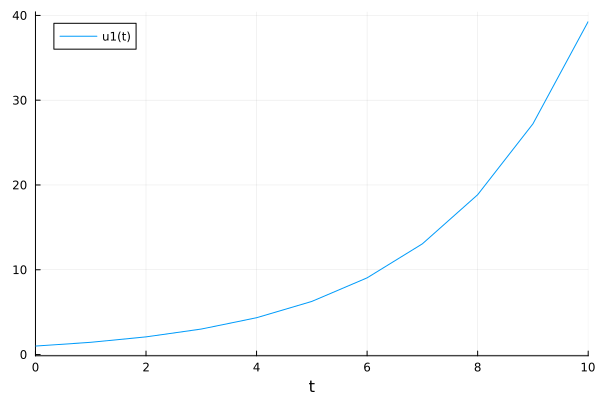

In [197]:
newprob_t = remake(prob, p = optsol_t.u)
newsol_t = solve(newprob_t, Tsit5(),saveat=1)
plot(newsol_t)

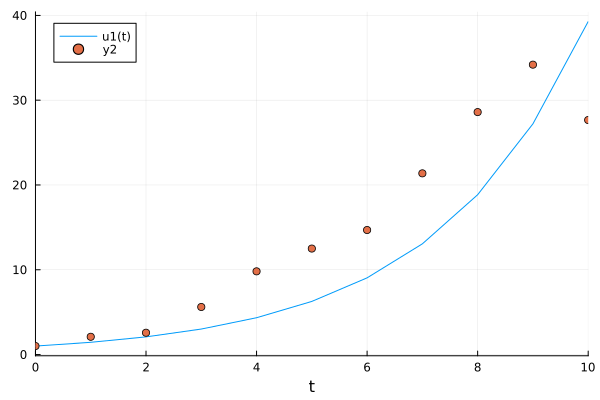

In [198]:
scatter!(timepts,data_t_plot)

In [199]:
rss_t=sum((newsol_t-data_ag).^2)
tss_t=sum((data_t.-mean(data_t)).^2)
rsq_t=1-(rss_t./tss_t)

-0.09414295562783215

In [200]:
#export data
CSV.write("Predicted_tyk_exp.csv", newsol_t)

"Predicted_tyk_exp.csv"

Tyk-nu cp.r GFP

In [201]:
tykg="C:\\Users\\adelpinoherrera\\Dropbox (UFL)\\research-share\\Adriana\\Conferences and Symposiums\\2023\\BMES\\Code\\tykGFP_norm.csv"
tyk2=CSV.read(tykg,DataFrame)
data_tg=Matrix(tyk2)
data_tg_plot=data_tg[1,:]

11-element Vector{Float64}:
  1.0
  1.208812765
  2.022105109
  2.844019909
  4.034475187
  7.0787586
 12.50117113
 20.23217684
 31.27448397
 39.91919192
 41.55189577

In [202]:
cost_function_tg = build_loss_objective(prob, Tsit5(), L2Loss(t, data_tg),
                                     Optimization.AutoForwardDiff(),
                                     maxiters = 10000, verbose = false)

(::OptimizationFunction{true, AutoForwardDiff{nothing, Nothing}, DiffEqParamEstim.var"#29#30"{Nothing, typeof(DiffEqParamEstim.STANDARD_PROB_GENERATOR), Base.Pairs{Symbol, Integer, Tuple{Symbol, Symbol}, NamedTuple{(:maxiters, :verbose), Tuple{Int64, Bool}}}, ODEProblem{Vector{Float64}, Tuple{Float64, Float64}, true, Vector{Float64}, ODEFunction{true, SciMLBase.AutoSpecialize, typeof(f), LinearAlgebra.UniformScaling{Bool}, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, typeof(SciMLBase.DEFAULT_OBSERVED), Nothing, Nothing}, Base.Pairs{Symbol, Union{}, Tuple{}, NamedTuple{(), Tuple{}}}, SciMLBase.StandardODEProblem}, Tsit5{typeof(OrdinaryDiffEq.trivial_limiter!), typeof(OrdinaryDiffEq.trivial_limiter!), Static.False}, L2Loss{Vector{Float64}, Matrix{Float64}, Nothing, Nothing, Nothing}, Nothing, Tuple{}}, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing,

In [203]:
optprob_tg = Optimization.OptimizationProblem(cost_function_tg, [0.1])
optsol_tg = solve(optprob_tg, BFGS())

u: 1-element Vector{Float64}:
 0.3906978023714514

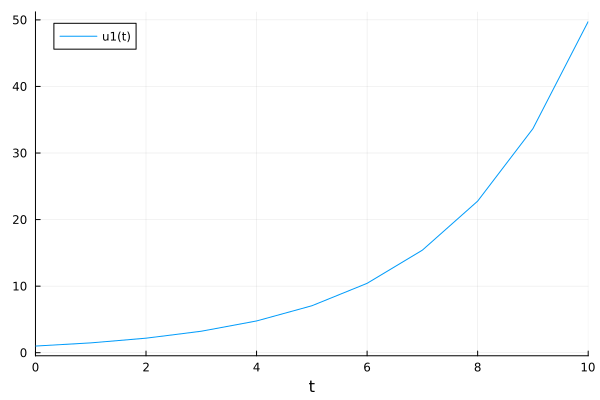

In [204]:
newprob_tg = remake(prob, p = optsol_tg.u)
newsol_tg = solve(newprob_tg, Tsit5(),saveat=1)
plot(newsol_tg)

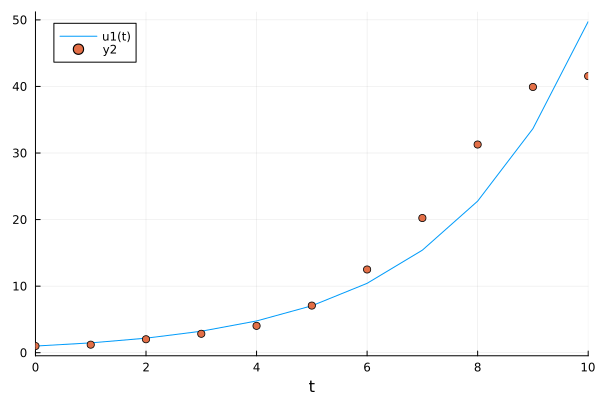

In [205]:
scatter!(timepts,data_tg_plot)

In [206]:
rss_tg=sum((newsol_tg-data_tg).^2)
tss_tg=sum((data_tg.-mean(data_tg)).^2)
rsq_tg=1-(rss_tg./tss_tg)

0.9175080346214678

In [209]:
#export data
CSV.write("Predicted_tyk_GFP_exp.csv", newsol_tg)

"Predicted_tyk_GFP_exp.csv"

# Logistic growth

In [4]:
# logistic growth of a single population with carrying capacity
function log(du,u,p,t)
    du[1] = p[1].*u[1].*(1-(u[1]./p[2]))
end

u0=[1.0]
tspan=(0.0,10.0)
p2=[1,80.0]
prob2=ODEProblem(log,u0,tspan,p2)

ODEProblem with uType Vector{Float64} and tType Float64. In-place: true
timespan: (0.0, 10.0)
u0: 1-element Vector{Float64}:
 1.0

In [6]:
sol2=solve(prob2,Tsit5())

retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 15-element Vector{Float64}:
  0.0
  0.10027193472432905
  0.35133980743114646
  0.6920350379879847
  1.1053691131355963
  1.6043874534419649
  2.1836824390077503
  2.849163319215007
  3.6080005005437914
  4.493315728505963
  5.7953181333531205
  6.783154125180144
  8.009834022648906
  9.127133814979533
 10.0
u: 15-element Vector{Vector{Float64}}:
 [1.0]
 [1.1040159656576183]
 [1.4135319169444878]
 [1.9731671727256006]
 [2.945941459715778]
 [4.739336236755198]
 [8.08288588316255]
 [14.353591304103105]
 [25.466662853960454]
 [42.47437898880941]
 [64.50318135846318]
 [73.4303828442103]
 [77.95147825866076]
 [79.31729644008662]
 [79.7133212902143]

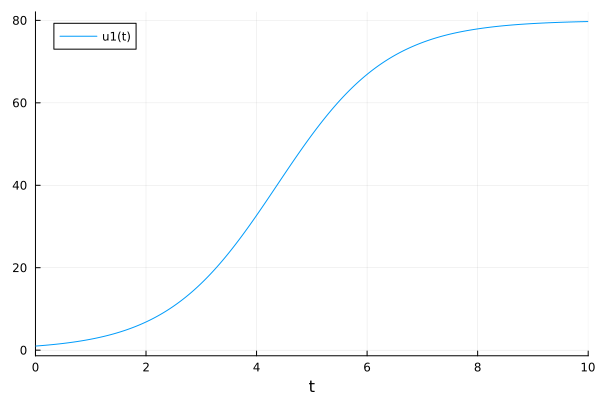

In [7]:
plot(sol2)

In [160]:
cost_function2 = build_loss_objective(prob2, Tsit5(), L2Loss(t, data),
                                     Optimization.AutoForwardDiff(),
                                     maxiters = 10000, verbose = false)

(::OptimizationFunction{true, AutoForwardDiff{nothing, Nothing}, DiffEqParamEstim.var"#29#30"{Nothing, typeof(DiffEqParamEstim.STANDARD_PROB_GENERATOR), Base.Pairs{Symbol, Integer, Tuple{Symbol, Symbol}, NamedTuple{(:maxiters, :verbose), Tuple{Int64, Bool}}}, ODEProblem{Vector{Float64}, Tuple{Float64, Float64}, true, Vector{Float64}, ODEFunction{true, SciMLBase.AutoSpecialize, typeof(log), LinearAlgebra.UniformScaling{Bool}, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, typeof(SciMLBase.DEFAULT_OBSERVED), Nothing, Nothing}, Base.Pairs{Symbol, Union{}, Tuple{}, NamedTuple{(), Tuple{}}}, SciMLBase.StandardODEProblem}, Tsit5{typeof(OrdinaryDiffEq.trivial_limiter!), typeof(OrdinaryDiffEq.trivial_limiter!), Static.False}, L2Loss{Vector{Float64}, Matrix{Float64}, Nothing, Nothing, Nothing}, Nothing, Tuple{}}, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothin

In [162]:
optprob2 = Optimization.OptimizationProblem(cost_function2, [0.1,20.0])
optsol2 = solve(optprob2, BFGS())

u: 2-element Vector{Float64}:
  0.5752556723788208
 14.526042221917388

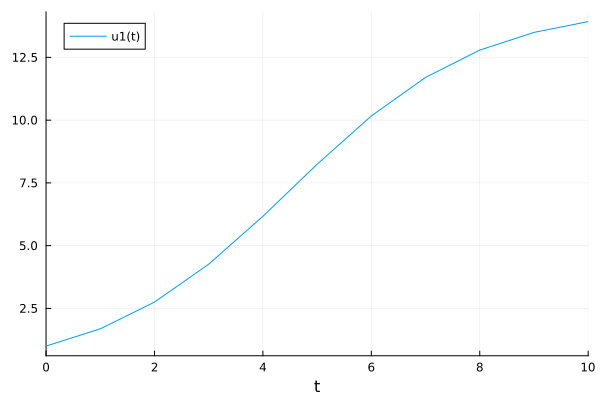

In [163]:
newprob2 = remake(prob2, p = optsol2.u)
newsol2 = solve(newprob2, Tsit5(),saveat=1)
plot(newsol2)

In [166]:
#export data
CSV.write("Predicted_a2780_log.csv", newsol2)

"Predicted_a2780_log.csv"

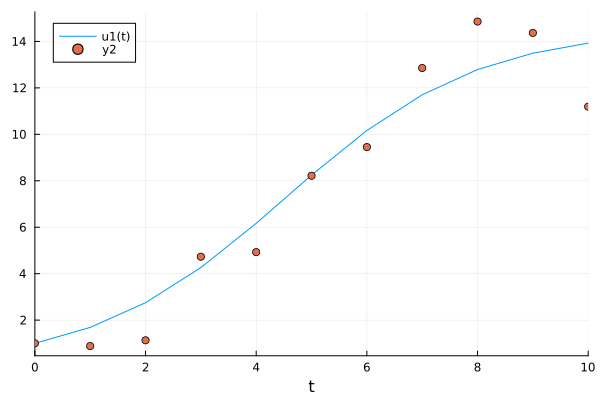

In [164]:
scatter!(timepts,data_plot)

In [165]:
#R sq A2780 log 
rss2=sum((newsol2-data).^2)
tss2=sum((data.-mean(data)).^2)
rsq2=1-(rss2./tss2)

0.9328795592624031

A2780cis GFP

In [213]:
cost_function_ag2 = build_loss_objective(prob2, Tsit5(), L2Loss(t, data_ag),
                                     Optimization.AutoForwardDiff(),
                                     maxiters = 10000, verbose = false)

(::OptimizationFunction{true, AutoForwardDiff{nothing, Nothing}, DiffEqParamEstim.var"#29#30"{Nothing, typeof(DiffEqParamEstim.STANDARD_PROB_GENERATOR), Base.Pairs{Symbol, Integer, Tuple{Symbol, Symbol}, NamedTuple{(:maxiters, :verbose), Tuple{Int64, Bool}}}, ODEProblem{Vector{Float64}, Tuple{Float64, Float64}, true, Vector{Float64}, ODEFunction{true, SciMLBase.AutoSpecialize, typeof(log), LinearAlgebra.UniformScaling{Bool}, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, typeof(SciMLBase.DEFAULT_OBSERVED), Nothing, Nothing}, Base.Pairs{Symbol, Union{}, Tuple{}, NamedTuple{(), Tuple{}}}, SciMLBase.StandardODEProblem}, Tsit5{typeof(OrdinaryDiffEq.trivial_limiter!), typeof(OrdinaryDiffEq.trivial_limiter!), Static.False}, L2Loss{Vector{Float64}, Matrix{Float64}, Nothing, Nothing, Nothing}, Nothing, Tuple{}}, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothin

In [214]:
optprob_ag2 = Optimization.OptimizationProblem(cost_function_ag2, [0.1,20.0])
optsol_ag2 = solve(optprob_ag2, BFGS())

u: 2-element Vector{Float64}:
 0.22711811024125472
 3.407983774353351e12

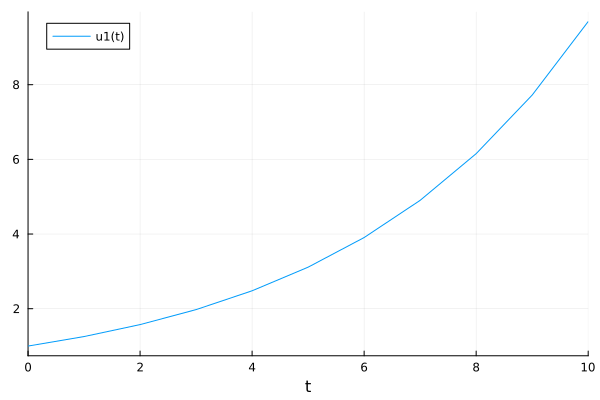

In [215]:
newprob_ag2 = remake(prob2, p = optsol_ag2.u)
newsol_ag2 = solve(newprob_ag2, Tsit5(),saveat=1)
plot(newsol_ag2)

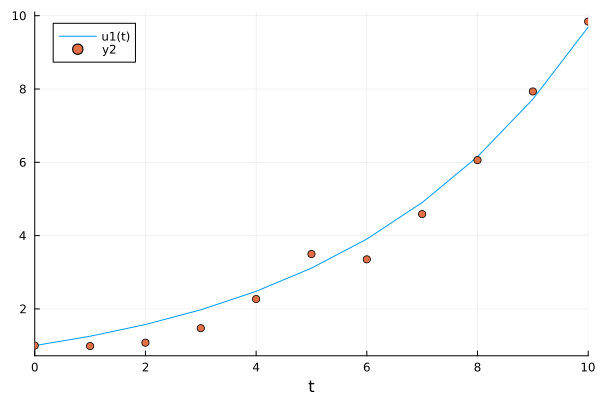

In [216]:
scatter!(timepts,data_ag_plot)

In [218]:
#R s log 
rss_ag2=sum((newsol_ag2-data_ag).^2)
tss_ag2=sum((data_ag.-mean(data_ag)).^2)
rsq_ag2=1-(rss_ag2./tss_ag2)

0.986225698768068

In [219]:
#export data
CSV.write("Predicted_a2780GFP_log.csv", newsol_ag2)

"Predicted_a2780GFP_log.csv"

Tyk-nu

In [226]:
cost_function_t2 = build_loss_objective(prob2, Tsit5(), L2Loss(t, data_t),
                                     Optimization.AutoForwardDiff(),
                                     maxiters = 10000, verbose = false)

(::OptimizationFunction{true, AutoForwardDiff{nothing, Nothing}, DiffEqParamEstim.var"#29#30"{Nothing, typeof(DiffEqParamEstim.STANDARD_PROB_GENERATOR), Base.Pairs{Symbol, Integer, Tuple{Symbol, Symbol}, NamedTuple{(:maxiters, :verbose), Tuple{Int64, Bool}}}, ODEProblem{Vector{Float64}, Tuple{Float64, Float64}, true, Vector{Float64}, ODEFunction{true, SciMLBase.AutoSpecialize, typeof(log), LinearAlgebra.UniformScaling{Bool}, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, typeof(SciMLBase.DEFAULT_OBSERVED), Nothing, Nothing}, Base.Pairs{Symbol, Union{}, Tuple{}, NamedTuple{(), Tuple{}}}, SciMLBase.StandardODEProblem}, Tsit5{typeof(OrdinaryDiffEq.trivial_limiter!), typeof(OrdinaryDiffEq.trivial_limiter!), Static.False}, L2Loss{Vector{Float64}, Matrix{Float64}, Nothing, Nothing, Nothing}, Nothing, Tuple{}}, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothin

In [224]:
data_t

1×11 Matrix{Float64}:
 1.0  2.09387  2.57172  5.60877  …  21.3726  28.5974  34.1922  27.6614

In [239]:
optprob_t2 = Optimization.OptimizationProblem(cost_function_t2, [0.1,50.0])
optsol_t2 = solve(optprob_t2, BFGS())

u: 2-element Vector{Float64}:
  0.5887209952449225
 34.69772503330743

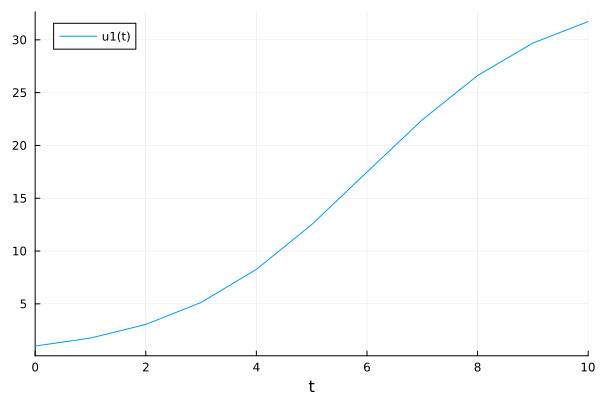

In [240]:
newprob_t2 = remake(prob2, p = optsol_t2.u)
newsol_t2 = solve(newprob_t2, Tsit5(),saveat=1)
plot(newsol_t2)

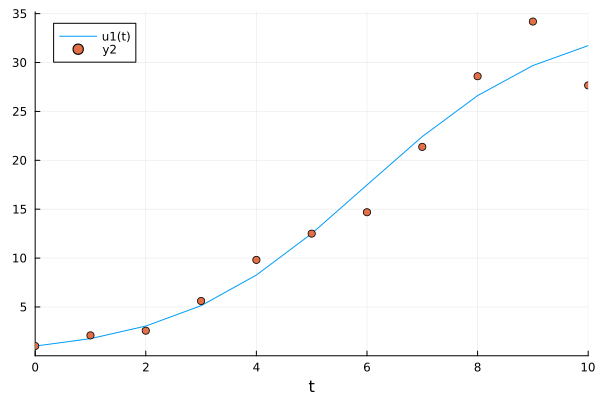

In [241]:
scatter!(timepts,data_t_plot)

In [242]:
#R s log 
rss_t2=sum((newsol_t2-data_t).^2)
tss_t2=sum((data_t.-mean(data_t)).^2)
rsq_t2=1-(rss_t2./tss_t2)

0.962198577703372

In [243]:
#export data
CSV.write("Predicted_tyk_log.csv", newsol_t2)

"Predicted_tyk_log.csv"

Tyk-nu cp.r GFP

In [230]:
cost_function_tg2 = build_loss_objective(prob2, Tsit5(), L2Loss(t, data_tg),
                                     Optimization.AutoForwardDiff(),
                                     maxiters = 10000, verbose = false)

(::OptimizationFunction{true, AutoForwardDiff{nothing, Nothing}, DiffEqParamEstim.var"#29#30"{Nothing, typeof(DiffEqParamEstim.STANDARD_PROB_GENERATOR), Base.Pairs{Symbol, Integer, Tuple{Symbol, Symbol}, NamedTuple{(:maxiters, :verbose), Tuple{Int64, Bool}}}, ODEProblem{Vector{Float64}, Tuple{Float64, Float64}, true, Vector{Float64}, ODEFunction{true, SciMLBase.AutoSpecialize, typeof(log), LinearAlgebra.UniformScaling{Bool}, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, typeof(SciMLBase.DEFAULT_OBSERVED), Nothing, Nothing}, Base.Pairs{Symbol, Union{}, Tuple{}, NamedTuple{(), Tuple{}}}, SciMLBase.StandardODEProblem}, Tsit5{typeof(OrdinaryDiffEq.trivial_limiter!), typeof(OrdinaryDiffEq.trivial_limiter!), Static.False}, L2Loss{Vector{Float64}, Matrix{Float64}, Nothing, Nothing, Nothing}, Nothing, Tuple{}}, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothin

In [233]:
optprob_tg2 = Optimization.OptimizationProblem(cost_function_tg2, [0.1,50.0])
optsol_tg2 = solve(optprob_tg2, BFGS())

u: 2-element Vector{Float64}:
  0.48778580235423075
 66.30619380407128

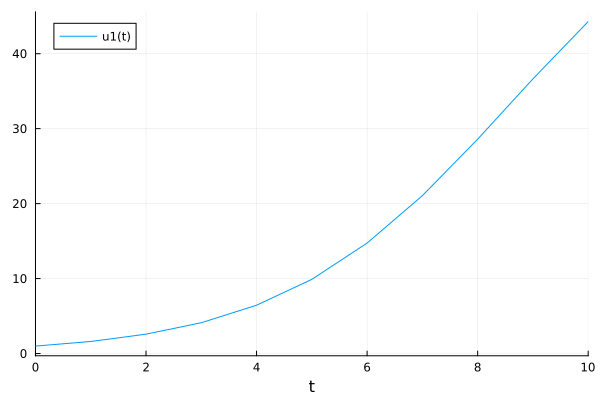

In [235]:
newprob_tg2 = remake(prob2, p = optsol_tg2.u)
newsol_tg2 = solve(newprob_tg2, Tsit5(),saveat=1)
plot(newsol_tg2)

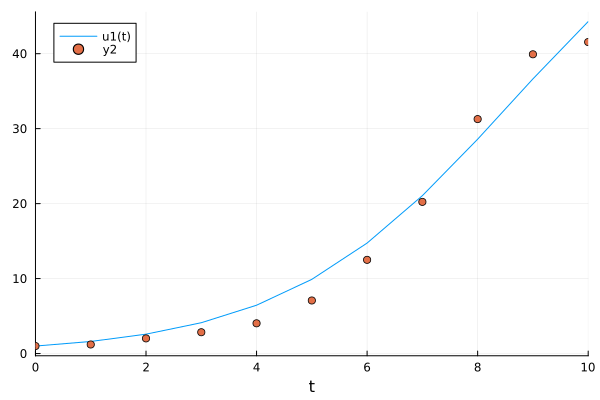

In [236]:
scatter!(timepts,data_tg_plot)

In [237]:
#R s log 
rss_tg2=sum((newsol_tg2-data_tg).^2)
tss_tg2=sum((data_tg.-mean(data_tg)).^2)
rsq_tg2=1-(rss_tg2./tss_tg2)

0.9812654306651976

In [238]:
#export data
CSV.write("Predicted_tykGFP_log.csv", newsol_tg2)

"Predicted_tykGFP_log.csv"

# Lotka-Volterra model 

90-10 Problem 3

In [253]:
# logistic growth of a single population with carrying capacity
function lv(du,u,p,t)
    du[1] = 0.588720995244922.*u[1].*(1-(u[1]./34.6977250333074)) + p[1].*u[1].*u[2]
    du[2] = 0.48778580235423.*u[2].*(1-(u[2]./66.3061938040712)) + p[2].*u[1].*u[2]
end

u09=[0.9; 0.1]
tspan=(0.0,10.0)
p3=[0.005,0.005]
prob3=ODEProblem(lv,u09,tspan,p3)

ODEProblem with uType Vector{Float64} and tType Float64. In-place: true
timespan: (0.0, 10.0)
u0: 2-element Vector{Float64}:
 0.9
 0.1

In [254]:
sol3=solve(prob3,Tsit5())

retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 12-element Vector{Float64}:
  0.0
  0.11346344597528535
  0.5060064216421907
  1.0937004498279208
  1.7912051897240588
  2.658651685902382
  3.668436022557529
  4.837696254676879
  6.151404639091025
  7.566524003985485
  9.041806769718816
 10.0
u: 12-element Vector{Vector{Float64}}:
 [0.9, 0.1]
 [0.9605068920180759, 0.10573730564969966]
 [1.201848960151421, 0.12827947781688656]
 [1.6754235524018957, 0.17147324181554643]
 [2.4674487191973675, 0.24243885918495808]
 [3.930836835505702, 0.3745007986355912]
 [6.53837419778479, 0.6267092996681243]
 [11.018514416929488, 1.1574191213643839]
 [17.589222097521528, 2.3727089329294997]
 [24.89320385513541, 5.297339361130071]
 [31.170831688709267, 12.236094215153887]
 [34.64454246824886, 20.41953944302551]

In [257]:
tyk9="C:\\Users\\adelpinoherrera\\Dropbox (UFL)\\research-share\\Adriana\\Conferences and Symposiums\\2023\\BMES\\Code\\co_culture_90_10.csv"
tyk9g=CSV.read(tyk9,DataFrame)
data_9=Matrix(tyk9g)
#data_9_plot=data_9[:,:]

2×11 Matrix{Float64}:
 0.9  2.04644   3.85646   7.96743   9.31587   …  24.6894    24.6986   23.967
 0.1  0.303177  0.312912  0.606353  0.717611      0.999927   1.19046   2.0235

In [263]:
data_9_plot=data_9[1,:]
data_1_plot=data_9[2,:]

11-element Vector{Float64}:
 0.1
 0.303176694
 0.312911726
 0.606353389
 0.717610892
 1.367076563
 0.995754648
 1.866344605
 0.999926804
 1.190455277
 2.023495828

In [258]:
cost_function_93 = build_loss_objective(prob3, Tsit5(), L2Loss(t, data_9),
                                     Optimization.AutoForwardDiff(),
                                     maxiters = 10000, verbose = false)

(::OptimizationFunction{true, AutoForwardDiff{nothing, Nothing}, DiffEqParamEstim.var"#29#30"{Nothing, typeof(DiffEqParamEstim.STANDARD_PROB_GENERATOR), Base.Pairs{Symbol, Integer, Tuple{Symbol, Symbol}, NamedTuple{(:maxiters, :verbose), Tuple{Int64, Bool}}}, ODEProblem{Vector{Float64}, Tuple{Float64, Float64}, true, Vector{Float64}, ODEFunction{true, SciMLBase.AutoSpecialize, typeof(lv), LinearAlgebra.UniformScaling{Bool}, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, typeof(SciMLBase.DEFAULT_OBSERVED), Nothing, Nothing}, Base.Pairs{Symbol, Union{}, Tuple{}, NamedTuple{(), Tuple{}}}, SciMLBase.StandardODEProblem}, Tsit5{typeof(OrdinaryDiffEq.trivial_limiter!), typeof(OrdinaryDiffEq.trivial_limiter!), Static.False}, L2Loss{Vector{Float64}, Matrix{Float64}, Nothing, Nothing, Nothing}, Nothing, Tuple{}}, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing

In [260]:
optprob_93 = Optimization.OptimizationProblem(cost_function_93, [0.005,0.005])
optsol_93 = solve(optprob_93, BFGS())

u: 2-element Vector{Float64}:
   14.388577472463021
 -140.83481983928806

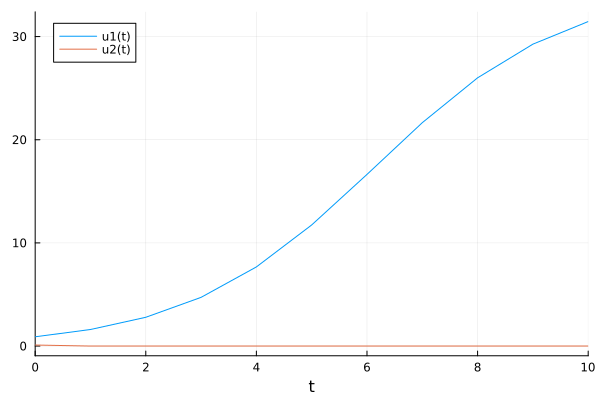

In [261]:
newprob_93 = remake(prob3, p = optsol_93.u)
newsol_93 = solve(newprob_93, Tsit5(),saveat=1)
plot(newsol_93)

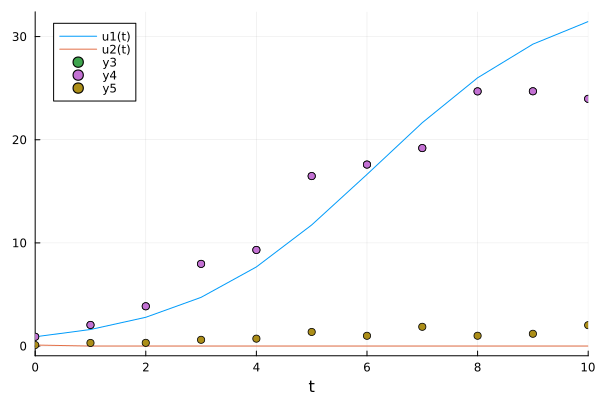

In [265]:
scatter!(timepts,data_9_plot)
scatter!(timepts,data_1_plot)

In [266]:
CSV.write("Predicted_tyk90_10_log.csv", newsol_93)

"Predicted_tyk90_10_log.csv"

50-50 Problem 3

In [314]:
# logistic growth of a single population with carrying capacity
function lv5(du,u,p,t)
    du[1] = 0.588720995244922.*u[1].*(1-(u[1]./34.6977250333074)) + p[1].*u[1].*u[2]
    du[2] = 0.48778580235423.*u[2].*(1-(u[2]./66.3061938040712)) + p[2].*u[1].*u[2]
end


u05=[0.5; 0.5]
tspan=(0.0,10.0)
p4=[0.00005,0.00005]
prob4=ODEProblem(lv5,u05,tspan,p4)

ODEProblem with uType Vector{Float64} and tType Float64. In-place: true
timespan: (0.0, 10.0)
u0: 2-element Vector{Float64}:
 0.5
 0.5

In [315]:
sol4=solve(prob4,Tsit5())

retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 12-element Vector{Float64}:
  0.0
  0.11339820522606896
  0.5034801580013211
  1.0863753262065945
  1.7777697776338957
  2.635824661115777
  3.6334648039640016
  4.7904937308860145
  6.111801586399017
  7.643458103735439
  9.418390321798716
 10.0
u: 12-element Vector{Vector{Float64}}:
 [0.5, 0.5]
 [0.5339896996358454, 0.5282112467327091]
 [0.669192773033078, 0.6378583276452043]
 [0.935790270016057, 0.8449763506848803]
 [1.3871500150030585, 1.1779162373520116]
 [2.24012527216841, 1.7738974311124507]
 [3.8330657593306556, 2.8386540502832247]
 [6.838912839004271, 4.835858938310373]
 [12.089053140234535, 8.647317582310468]
 [19.740237567558673, 15.96195065423609]
 [27.43548937788447, 28.54699428239923]
 [29.23089968070436, 33.24544570056633]

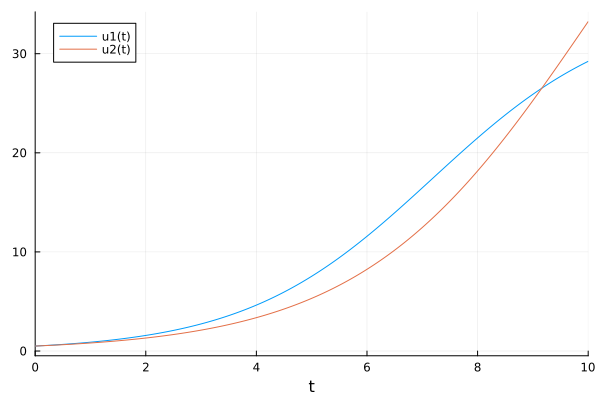

In [329]:
plot(sol4)

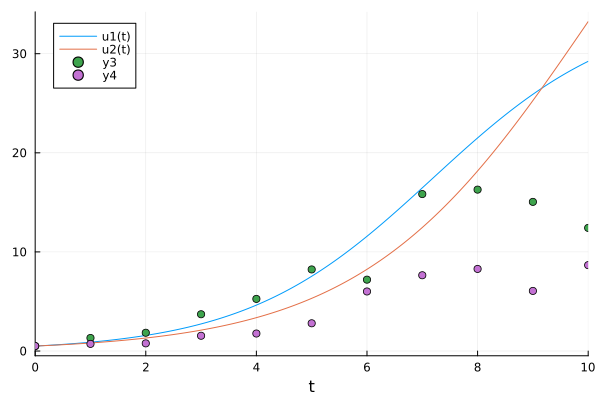

In [330]:
scatter!(timepts,data_51_plot)
scatter!(timepts,data_52_plot)

In [268]:
tyk5="C:\\Users\\adelpinoherrera\\Dropbox (UFL)\\research-share\\Adriana\\Conferences and Symposiums\\2023\\BMES\\Code\\co_culture_50_50.csv"
tyk5g=CSV.read(tyk5,DataFrame)
data_5=Matrix(tyk5g)

2×11 Matrix{Float64}:
 0.5  1.31562   1.84256   3.70933  5.25956  …  16.2845   15.049    12.4219
 0.5  0.719002  0.771849  1.53953  1.76482      8.28312   6.06353   8.66418

In [269]:
data_51_plot=data_5[1,:]
data_52_plot=data_5[2,:]

11-element Vector{Float64}:
 0.5
 0.71900161
 0.771848924
 1.539525692
 1.764822134
 2.798126189
 6.007905138
 7.644781145
 8.283121066
 6.06353389
 8.664178012

In [320]:
cost_function_53 = build_loss_objective(prob4, Tsit5(), L2Loss(t, data_5),
                                     Optimization.AutoForwardDiff(),
                                     maxiters = 10000, verbose = false)

(::OptimizationFunction{true, AutoForwardDiff{nothing, Nothing}, DiffEqParamEstim.var"#29#30"{Nothing, typeof(DiffEqParamEstim.STANDARD_PROB_GENERATOR), Base.Pairs{Symbol, Integer, Tuple{Symbol, Symbol}, NamedTuple{(:maxiters, :verbose), Tuple{Int64, Bool}}}, ODEProblem{Vector{Float64}, Tuple{Float64, Float64}, true, Vector{Float64}, ODEFunction{true, SciMLBase.AutoSpecialize, typeof(lv5), LinearAlgebra.UniformScaling{Bool}, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, typeof(SciMLBase.DEFAULT_OBSERVED), Nothing, Nothing}, Base.Pairs{Symbol, Union{}, Tuple{}, NamedTuple{(), Tuple{}}}, SciMLBase.StandardODEProblem}, Tsit5{typeof(OrdinaryDiffEq.trivial_limiter!), typeof(OrdinaryDiffEq.trivial_limiter!), Static.False}, L2Loss{Vector{Float64}, Matrix{Float64}, Nothing, Nothing, Nothing}, Nothing, Tuple{}}, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothin

In [319]:
prob4

ODEProblem with uType Vector{Float64} and tType Float64. In-place: true
timespan: (0.0, 10.0)
u0: 2-element Vector{Float64}:
 0.5
 0.5

In [344]:
optprob_53 = Optimization.OptimizationProblem(cost_function_53, [-0.5,-0.5])
optsol_53 = solve(optprob_53, BFGS())

u: 2-element Vector{Float64}:
 -0.027269315898524583
 -0.023495105276732826

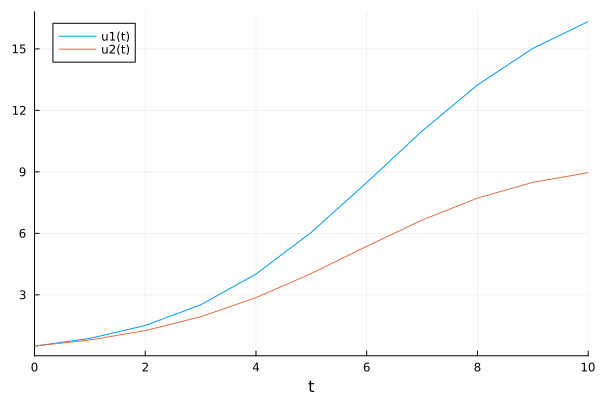

In [345]:
newprob_53 = remake(prob4, p = optsol_53.u)
newsol_53 = solve(newprob_53, Tsit5(),saveat=1)
plot(newsol_53)

In [346]:
newsol_53

retcode: Success
Interpolation: 1st order linear
t: 11-element Vector{Float64}:
  0.0
  1.0
  2.0
  3.0
  4.0
  5.0
  6.0
  7.0
  8.0
  9.0
 10.0
u: 11-element Vector{Vector{Float64}}:
 [0.5, 0.5]
 [0.8752828118038292, 0.7978614213847405]
 [1.5041118002414793, 1.2550646793136107]
 [2.5108592975082336, 1.9292124084675766]
 [4.014936875808631, 2.8628960041925238]
 [6.051886727950153, 4.043323586733271]
 [8.482412248323373, 5.365767488972614]
 [10.992568558561226, 6.649607124370581]
 [13.239919204648448, 7.720405901646026]
 [15.025475266843255, 8.489416215293154]
 [16.333855977822235, 8.961944084290822]

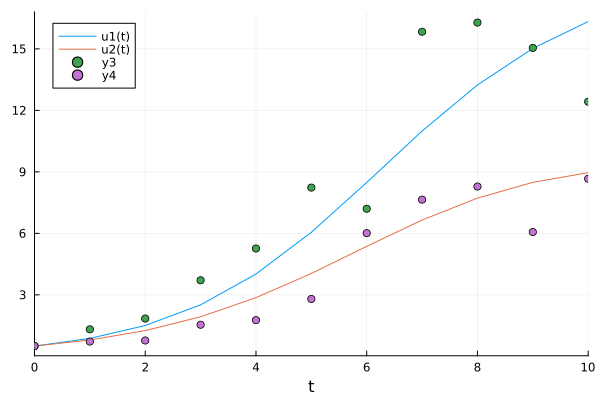

In [347]:
scatter!(timepts,data_51_plot)
scatter!(timepts,data_52_plot)

In [349]:
#export data
CSV.write("Predicted_tyk_50_50_exp.csv", newsol_53)

"Predicted_tyk_50_50_exp.csv"

10-90 Problem 

In [326]:
u01=[0.1; 0.9]
tspan=(0.0,10.0)
p3=[0.005,0.005]
prob5=ODEProblem(lv,u01,tspan,p3)

ODEProblem with uType Vector{Float64} and tType Float64. In-place: true
timespan: (0.0, 10.0)
u0: 2-element Vector{Float64}:
 0.1
 0.9

In [327]:
sol5=solve(prob5,Tsit5())

retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 12-element Vector{Float64}:
  0.0
  0.11328555375438898
  0.4981115826227982
  1.0702679791036087
  1.7472264013901249
  2.5811758369009343
  3.5408232328103564
  4.63294579979894
  5.842198006937049
  7.162773792705449
  8.582932605419057
 10.0
u: 12-element Vector{Vector{Float64}}:
 [0.1, 0.9]
 [0.10693155065978036, 0.9504556894351686]
 [0.13428560934647882, 1.143591995880997]
 [0.18848561873564793, 1.504082459471497]
 [0.2817174903493731, 2.075784881561516]
 [0.46280809800769385, 3.074198821508308]
 [0.8211326639748289, 4.791309530106688]
 [1.5812222913494474, 7.815574982695077]
 [3.268541109904632, 13.051681994396338]
 [7.125340307495265, 21.748677616717323]
 [15.447982015974734, 35.0325576393072]
 [28.660751058593814, 51.97205160982946]

In [331]:
tyk1="C:\\Users\\adelpinoherrera\\Dropbox (UFL)\\research-share\\Adriana\\Conferences and Symposiums\\2023\\BMES\\Code\\co_culture_10_90.csv"
tyk1g=CSV.read(tyk1,DataFrame)
data_1=Matrix(tyk1g)

2×11 Matrix{Float64}:
 0.1  0.500659  0.585493  1.16959  2.30581  …   7.028    7.81167  5.68387
 0.9  0.684234  0.621651  1.77317  2.24601     12.8822  11.351    8.31372

In [395]:
data_11_plot=data_1[1,:]
data_91_plot=data_1[2,:]

11-element Vector{Float64}:
  0.9
  0.684233641
  0.621651296
  1.773166447
  2.246010833
  3.359976577
  7.50153711
 10.87959303
 12.88222808
 11.3510467
  8.313716879

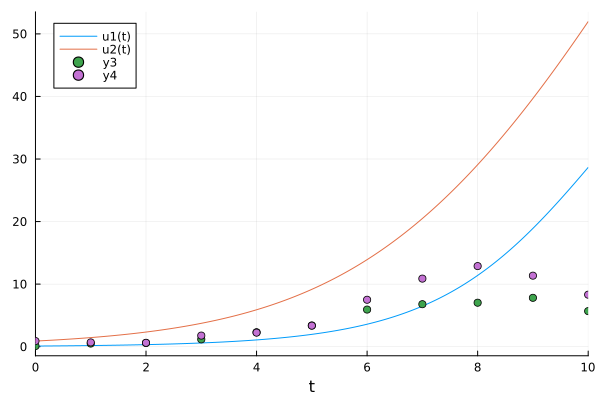

In [396]:
plot(sol5)
scatter!(timepts,data_11_plot)
scatter!(timepts,data_91_plot)

In [334]:
cost_function_13 = build_loss_objective(prob5, Tsit5(), L2Loss(t, data_1),
                                     Optimization.AutoForwardDiff(),
                                     maxiters = 10000, verbose = false)

(::OptimizationFunction{true, AutoForwardDiff{nothing, Nothing}, DiffEqParamEstim.var"#29#30"{Nothing, typeof(DiffEqParamEstim.STANDARD_PROB_GENERATOR), Base.Pairs{Symbol, Integer, Tuple{Symbol, Symbol}, NamedTuple{(:maxiters, :verbose), Tuple{Int64, Bool}}}, ODEProblem{Vector{Float64}, Tuple{Float64, Float64}, true, Vector{Float64}, ODEFunction{true, SciMLBase.AutoSpecialize, typeof(lv), LinearAlgebra.UniformScaling{Bool}, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, typeof(SciMLBase.DEFAULT_OBSERVED), Nothing, Nothing}, Base.Pairs{Symbol, Union{}, Tuple{}, NamedTuple{(), Tuple{}}}, SciMLBase.StandardODEProblem}, Tsit5{typeof(OrdinaryDiffEq.trivial_limiter!), typeof(OrdinaryDiffEq.trivial_limiter!), Static.False}, L2Loss{Vector{Float64}, Matrix{Float64}, Nothing, Nothing, Nothing}, Nothing, Tuple{}}, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing

In [400]:
optprob_13 = Optimization.OptimizationProblem(cost_function_13, [-0.0005,-0.0005])
optsol_13 = solve(optprob_13, BFGS())

u: 2-element Vector{Float64}:
 -0.015329911180255482
 -0.09010538034217748

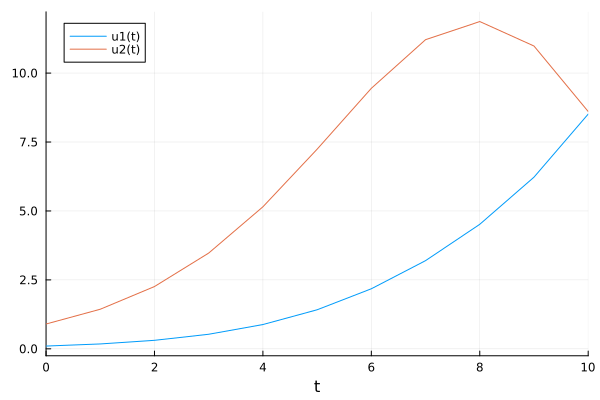

In [401]:
newprob_13 = remake(prob5, p = optsol_13.u)
newsol_13 = solve(newprob_13, Tsit5(),saveat=1)
plot(newsol_13)

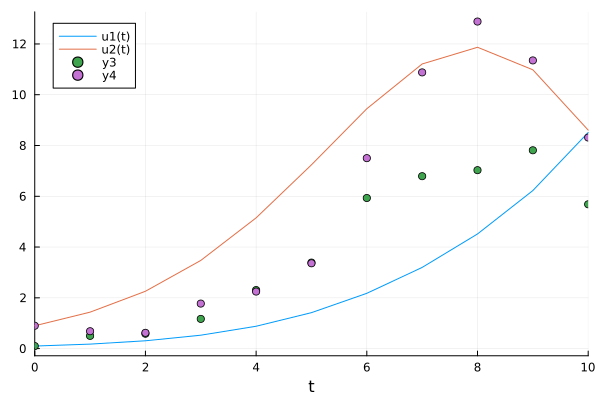

In [402]:
scatter!(timepts,data_11_plot)
scatter!(timepts,data_91_plot)

In [403]:
#export data
CSV.write("Predicted_tyk_10_90_exp.csv", newsol_13)

"Predicted_tyk_10_90_exp.csv"